# Importando bibliotecas

# TECH Challenge
# Enunciado
Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo.
Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:
1. País de origem (Brasil).
2. País de destino.
3. Quantidade em litros de vinho exportado (utilize: 1KG =1L).
4. Valor em US$.

Os dados que lhe forneceram são de uma vinícola parceira, e podem ser encontrados aqui: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01
Seu objetivo é dizer o **montante de venda de exportação nos últimos 15 anos**, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações. 


Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

In [190]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import seaborn as sb
from datetime import date
import matplotlib.ticker as ticker
import matplotlib
import my_functions as my

In [191]:
colors_dict = {
    'dark wine':'#50163f',
    'medium wine':'#a10094',
    'bright wine':'#ff5db6',
    'olive green':'#918700',
    'olive yellow':'#cf9800',
    'brown':'#974d1c',
    'neon green':'#84dc00',
    'neon cyan':'#00cbb7',
    'neon blue':'#a00500',
    'dark red':'#ff3f3f',
    'neon red':'#817700',
}

colors_main = [list(colors_dict.values())[i] for i in range(0,6)]
colors_accent = [list(colors_dict.values())[i] for i in range(6,len(colors_dict))]
colors_rotation = [colors_main[0],
                   colors_main[1],
                   colors_main[2],
                   '#b732d1',
                   '#be85ff',
                   '#5779c2',
                   '#82afb9',
                   '#32862a',
                   '#918700',
                   '#cf9800',
                   '#974d1c',
                   '#e02424']


cycler_main = cycler(color=colors_main)
cycler_accent = cycler(color=colors_accent)
cycler_rotation = cycler(color=colors_rotation)


my.set_axes_cycler(cycler_main)
# plt.rc('axes', prop_cycle=cycler_main)

# Processing

In [192]:
df_exports = pd.read_csv('./extraidos_final/ALL_exports.csv', index_col=0)
df_population = pd.read_csv('./extraidos_final/countries_population.csv', index_col=0)

In [193]:
export_type = df_exports['tipo'].unique()
type_color_name = {
    'Vinhos de mesa': 'dark wine',
    'Vinhos espumantes':'medium wine',
    'Suco de uva':'olive yellow',
    'Uvas frescas':'olive green'
}

type_color = {key: colors_dict[value] for key,value in zip(type_color_name.keys(), type_color_name.values())}

In [194]:
df_exports['kg'] = df_exports['kg'].replace(0,np.nan)

In [195]:
df_exports['valor_por_kg'] = df_exports['valor'] / df_exports ['kg']

In [196]:
df_exports['ano'] = df_exports['ano'].map(lambda x : date(int(x),1, 1))

In [197]:
sorted(df_exports['pais_destino'].unique());

In [198]:
replace_dictionary = {
    'Alemanha, República Democrática':'Alemanha',
    'Alemanha, República Democrática da':'Alemanha', 
    'Australia':'Austrália',
    'Belice': 'Belize',
    'Bulgaria': 'Bulgária',
    'Bósnia': 'Bósnia-Herzegovina',
    'Canada': 'Canadá',
    'Colombia':'Colômbia',
    'Coreia do Sul, Republica da':'Coreia do Sul',
    'Coreia, Republica Sul' : 'Coreia do Sul',
    'Coveite (Kuweit)' : 'Kuweit',
    'Dominica, Ilha de':'Dominica',
    'Emirados Arabes Unidos':'Emirados Árabes Unidos',
    'Estonia':'Estônia',
    'Falkland (Ilhas Malvinas)':'Falkland (Malvinas)',
    'Filânldia':'Finlândia', 
    'Guine Equatorial':'Guiné Equatorial',
    'Guine Bissau':'Guiné Bissau',
    'Guiné-Bissau':'Guiné Bissau',
    'India':'Índia',
    'Países Baixos (Holanda)':'Países Baixos',
    'Republica Dominicana':'República Dominicana',
    'República Federativa da Rússia':'Rússia',
    'Tcheca, República':'República Tcheca',
    'Rússia,  Federação da':'Rússia',
    'Taiwan (Formosa)':'Taiwan',
    'Trinidade Tobago':'Trindade e Tobago',
    'Trinidade e Tobago':'Trindade e Tobago',
}

In [199]:
continents = {
  "Afeganistão": "Ásia",
  "Africa do Sul": "África",
  "Alemanha": "Europa",
  "Angola": "África",
  "Anguilla": "América do Norte",
  "Antigua e Barbuda": "América do Norte",
  "Antilhas Holandesas": "América do Norte",
  "Antígua e Barbuda": "América do Norte",
  "Arabia Saudita": "Ásia",
  "Argentina": "América do Sul",
  "Argélia": "África",
  "Aruba": "América do Sul",
  "Arábia Saudita": "Ásia",
  "Austrália": "Oceania",
  "Bahamas": "América do Norte",
  "Bahrein": "Ásia",
  "Bangladesh": "Ásia",
  "Barbados": "América do Norte",
  "Barein": "Ásia",
  "Belgica": "Europa",
  "Belize": "América do Norte",
  "Benin": "África",
  "Bermudas": "América do Norte",
  "Birmânia": "Ásia",
  "Bolívia": "América do Sul",
  "Brasil": "América do Sul",
  "Bulgária": "Europa",
  "Burquina Faso": "África",
  "Bélgica": "Europa",
  "Bósnia-Herzegovina": "Europa",
  "Cabo Verde": "África",
  "Camarões": "África",
  "Camores": "África",
  "Canadá": "América do Norte",
  "Catar": "Ásia",
  "Cayman, Ilhas": "América do Norte",
  "Chile": "América do Sul",
  "China": "Ásia",
  "Chipre": "Ásia",
  "Cingapura": "Ásia",
  "Cocos (Keeling), Ilhas": "Oceania",
  "Colômbia": "América do Sul",
  "Comores": "África",
  "Congo": "África",
  "Cook, Ilhas": "Oceania",
  "Coreia do Norte": "Ásia",
  "Coreia do Sul": "Ásia",
  "Costa Rica": "América do Norte",
  "Costa do Marfim": "África",
  "Coveite": "Ásia",
  "Croácia": "Europa",
  "Cuba": "América do Norte",
  "Curaçao": "América do Sul",
  "Dinamarca": "Europa",
  "Djibuti": "África",
  "Dominica": "América do Norte",
  "Egito": "África",
  "El Salvador": "América do Norte",
  "Emirados Árabes Unidos": "Ásia",
  "Equador": "América do Sul",
  "Eslovaca, Republica": "Europa",
  "Eslovênia": "Europa",
  "Espanha": "Europa",
  "Estados Unidos": "América do Norte",
  "Estônia": "Europa",
  "Falkland (Malvinas)": "América do Sul",
  "Faroé, Ilhas": "Europa",
  "Filipinas": "Ásia",
  "Finlândia": "Europa",
  "França": "Europa",
  "Gabão": "África",
  "Gana": "África",
  "Georgia": "Ásia",
  "Gibraltar": "Europa",
  "Granada": "América do Norte",
  "Grécia": "Europa",
  "Guadalupe": "América do Norte",
  "Guatemala": "América do Norte",
  "Guiana": "América do Sul",
  "Guiana Francesa": "América do Sul",
  "Guiné Bissau": "África",
  "Guiné Equatorial": "África",
  "Haiti": "América do Norte",
  "Honduras": "América do Norte",
  "Hong Kong": "Ásia",
  "Hungria": "Europa",
  "Ilha de Man": "Europa",
  "Ilhas Virgens": "América do Norte",
  "Indonésia": "Ásia",
  "Iraque": "Ásia",
  "Irlanda": "Europa",
  "Irã": "Ásia",
  "Islândia": "Europa",
  "Israel": "Ásia",
  "Itália": "Europa",
  "Iugoslâvia": "Europa",
  "Jamaica": "América do Norte",
  "Japão": "Ásia",
  "Jordânia": "Ásia",
  "Jérsei": "Europa",
  "Kuweit": "Ásia",
  "Letônia": "Europa",
  "Libéria": "África",
  "Lituânia": "Europa",
  "Luxemburgo": "Europa",
  "Líbano": "Ásia",
  "Líbia": "África",
  "Macau": "Ásia",
  "Macedônia": "Europa",
  "Malavi": "África",
  "Maldivas": "Ásia",
  "Malta": "Europa",
  "Malásia": "Ásia",
  "Marianas do Norte, Ilhas": "Oceania",
  "Marrocos": "África",
  "Marshall, Ilhas": "Oceania",
  "Martinica": "América do Norte",
  "Mauricio": "África",
  "Mauritânia": "África",
  "Mexico": "América do Norte",
  "Mongólia": "Ásia",
  "Montenegro": "Europa",
  "Moçambique": "África",
  "México": "América do Norte",
  "Mônaco": "Europa",
  "Namíbia": "África",
  "Nicarágua": "América do Norte",
  "Nigéria": "África",
  "Noruega": "Europa",
  "Nova Caledônia": "Oceania",
  "Nova Zelândia": "Oceania",
  "Omã": "Ásia",
  "Outros(1)": np.nan,
  "Palau": "Oceania",
  "Panamá": "América do Norte",
  "Paquistão": "Ásia",
  "Paraguai": "América do Sul",
  "Países Baixos": "Europa",
  "Peru": "América do Sul",
  "Pitcairn": "Oceania",
  "Polônia": "Europa",
  "Porto Rico": "América do Norte",
  "Portugal": "Europa",
  "Provisão de Navios e Aeronaves": np.nan,
  "Quirguistão": "Ásia",
  "Quênia": "África",
  "Reino Unido": "Europa",
  "Republica Tcheca": "Europa",
  "República Centro Africana": "África",
  "República Dominicana": "América do Norte",
  "República Federativa da Rússia": "Europa/Ásia",
  "Romênia": "Europa",
  "Rússia": "Europa/Ásia",
  "Samoa Americana": "Oceania",
  "Senegal": "África",
  "Serra Leoa": "África",
  "Singapura": "Ásia",
  "Sri Lanka": "Ásia",
  "Suazilândia": "África",
  "Suriname": "América do Sul",
  "Suécia": "Europa",
  "Suíça": "Europa",
  "São Cristóvão e Névis": "América do Norte",
  "São Tomé e Príncipe": "África",
  "São Vicente e Granadinas": "América do Norte",
  "Sérvia": "Europa",
  "Tailândia": "Ásia",
  "Taiwan": "Ásia",
  "Tanzânia": "África",
  "Togo": "África",
  "Toquelau": "Oceania",
  "Trindade e Tobago": "América do Norte",
  "Tunísia": "África",
  "Turcas e Caicos, ilhas": "América do Norte",
  "Turquia": "Europa/Ásia",
  "Tuvalu": "Oceania",
  "Uruguai": "América do Sul",
  "Vanuatu": "Oceania",
  "Venezuela": "América do Sul",
  "Vietnã": "Ásia",
  "Wallis e Futuna, Ilhas": "Oceania",
  "África do Sul": "África",
  "Áustria": "Europa",
  "Índia": "Ásia"
}

In [200]:
df_exports = df_exports.replace(replace_dictionary.keys(),replace_dictionary.values())
sorted(df_exports['pais_destino'].unique())

['Afeganistão',
 'Africa do Sul',
 'Alemanha',
 'Angola',
 'Anguilla',
 'Antigua e Barbuda',
 'Antilhas Holandesas',
 'Antígua e Barbuda',
 'Arabia Saudita',
 'Argentina',
 'Argélia',
 'Aruba',
 'Arábia Saudita',
 'Austrália',
 'Bahamas',
 'Bahrein',
 'Bangladesh',
 'Barbados',
 'Barein',
 'Belgica',
 'Belize',
 'Benin',
 'Bermudas',
 'Birmânia',
 'Bolívia',
 'Brasil',
 'Bulgária',
 'Burquina Faso',
 'Bélgica',
 'Bósnia-Herzegovina',
 'Cabo Verde',
 'Camarões',
 'Camores',
 'Canadá',
 'Catar',
 'Cayman, Ilhas',
 'Chile',
 'China',
 'Chipre',
 'Cingapura',
 'Cocos (Keeling), Ilhas',
 'Colômbia',
 'Comores',
 'Congo',
 'Cook, Ilhas',
 'Coreia do Norte',
 'Coreia do Sul',
 'Costa Rica',
 'Costa do Marfim',
 'Coveite',
 'Croácia',
 'Cuba',
 'Curaçao',
 'Dinamarca',
 'Djibuti',
 'Dominica',
 'Egito',
 'El Salvador',
 'Emirados Árabes Unidos',
 'Equador',
 'Eslovaca, Republica',
 'Eslovênia',
 'Espanha',
 'Estados Unidos',
 'Estônia',
 'Falkland (Malvinas)',
 'Faroé, Ilhas',
 'Filipinas',
 '

In [201]:
large_numbers = ['kg','valor']
df_exports_million = df_exports.copy()
df_exports_million[large_numbers] = df_exports_million[large_numbers] / 1_000_000

# Perguntas

## Por PESO

### Qual a linha do tempo de exportações por peso?

In [202]:
df_exports_total_by_year = df_exports_million.groupby('ano').sum(numeric_only=True).reset_index()
df_exports_total_by_year['valor_por_kg'] = df_exports_total_by_year['valor'] / df_exports_total_by_year ['kg']
df_exports_total_by_year.head(3)

,ano,categoria,kg,valor,valor_por_kg
0,2009-01-01,0.0,86.023485,132.483328,1.540083
1,2010-01-01,0.0,65.570616,148.387866,2.263024
2,2011-01-01,0.0,65.170313,155.704050,2.389187


#### Total

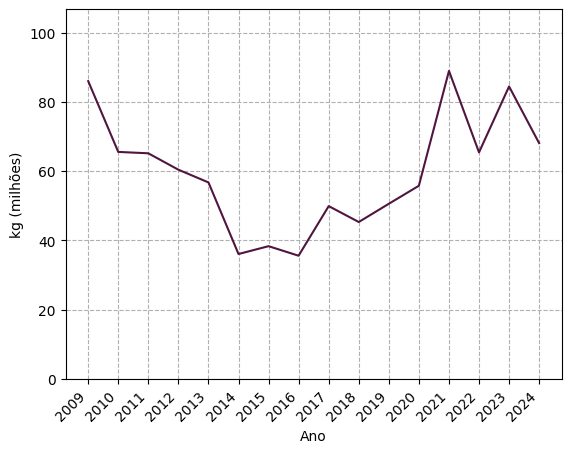

In [203]:
fig, ax = plt.subplots()
df = df_exports_total_by_year
plt.plot('ano', 'kg', data=df, label=None)
max = df_exports_total_by_year.max()['kg']
my.set_y_lim(df, 'kg')
my.set_labels('Ano', 'kg (milhões)')
my.ticks_on_years(ax)
my.rotate_label()

my.add_grid(ax)

#### Por categoria

In [204]:
df_exports_total_by_year_by_type = df_exports_million.groupby(['tipo','ano']).sum(numeric_only=True)
df_exports_total_by_year_by_type.head(10)

categoria        kg      valor  valor_por_kg
tipo        ano                                                     
Suco de uva 2009-01-01        0.0  5.859622  12.621332     50.843572
            2010-01-01        0.0  3.097697   8.048125     52.998184
            2011-01-01        0.0  4.452115  15.737683     67.288267
            2012-01-01        0.0  2.473423   7.719833     70.719225
            2013-01-01        0.0  4.211599  12.427609    104.099387
            2014-01-01        0.0  4.953029  12.865797     77.891839
            2015-01-01        0.0  2.610146   5.866363     60.026369
            2016-01-01        0.0  2.809237   6.924304     56.339772
            2017-01-01        0.0  2.274633   6.335596     75.815708
            2018-01-01        0.0  1.297681   2.931466     72.999981

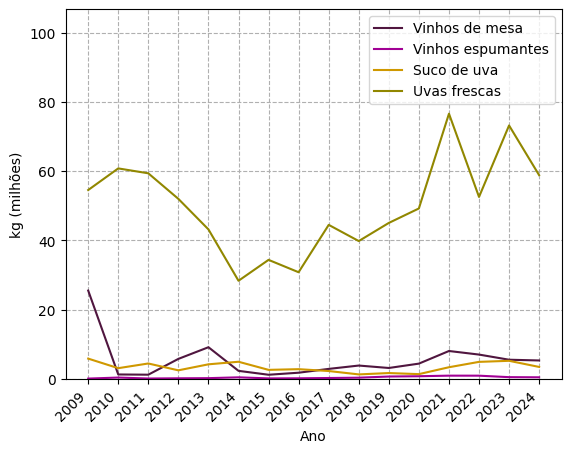

In [205]:
fig, ax = plt.subplots()

for kind in export_type:
    df = df_exports_total_by_year_by_type.loc[kind].reset_index()
    plt.plot('ano', 'kg', data=df, color=type_color[kind], label=kind)
my.add_grid(ax)
plt.legend()

my.set_labels('Ano', 'kg (milhões)')
my.ticks_on_years(ax)
my.rotate_label()
my.set_y_lim(df_exports_million.groupby('ano').sum(numeric_only=True).reset_index(), 'kg')

#### Por país

In [206]:
df_exports_by_country_by_year = df_exports_million.groupby(['pais_destino','ano']).sum(numeric_only=True).reset_index()
df_exports_by_country_by_year

,pais_destino,ano,categoria,kg,valor,valor_por_kg
0,Afeganistão,2009-01-01,0.0,0.000000,0.000000,0.000000
1,Afeganistão,2010-01-01,0.0,0.000000,0.000000,0.000000
2,Afeganistão,2011-01-01,0.0,0.000000,0.000000,0.000000
3,Afeganistão,2012-01-01,0.0,0.000000,0.000000,0.000000
4,Afeganistão,2013-01-01,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2939,Índia,2020-01-01,0.0,0.000534,0.001257,6.953273
2940,Índia,2021-01-01,0.0,0.000694,0.001492,10.422081
2941,Índia,2022-01-01,0.0,0.001015,0.003093,9.264061
2942,Índia,2023-01-01,0.0,0.000570,0.001951,6.325490


In [207]:
df_exports_by_country_top5 = df_exports_by_country_by_year.groupby('pais_destino').sum(numeric_only=True).sort_values('kg', 
                                                                                                               ascending=False).head(5).reset_index()['pais_destino']
df_exports_by_country_top5

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Paraguai
Name: pais_destino, dtype: object

Text(0.5, 1.0, 'Exportações TOTAIS por PESO')

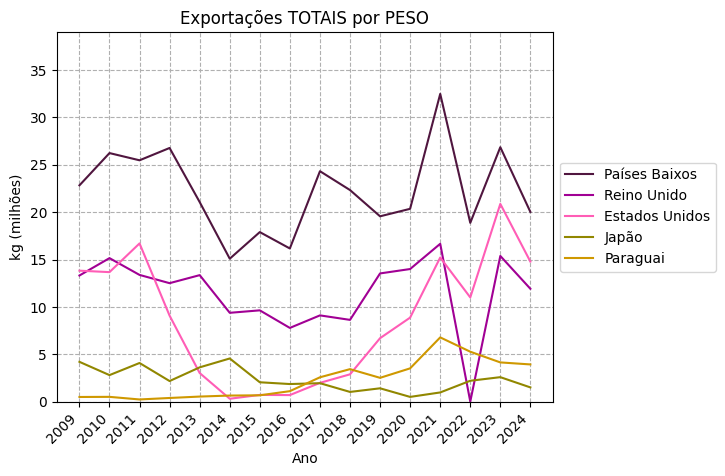

In [208]:
fig, ax = plt.subplots()

my.set_axes_cycler(cycler_rotation)

for country in df_exports_by_country_top5:
    df = df_exports_by_country_by_year.loc[df_exports_by_country_by_year['pais_destino'] == country]
    plt.plot('ano','kg', data=df, label=country)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

my.rotate_label()
my.set_y_lim(df_exports_by_country_by_year, 'kg')
my.set_labels('Ano','kg (milhões)')
my.ticks_on_years(ax)
my.add_grid(ax)
plt.title('Exportações TOTAIS por PESO')

#### Top 10 países por categoria 

In [209]:
df_exports_by_type_by_country_by_year = df_exports_million.groupby(['tipo','pais_destino','ano']).sum(numeric_only=True).reset_index()
df_exports_by_type_by_country_by_year

,tipo,pais_destino,ano,categoria,kg,valor,valor_por_kg
0,Suco de uva,Alemanha,2009-01-01,0.0,0.000000,0.000000,0.00
1,Suco de uva,Alemanha,2010-01-01,0.0,0.000000,0.000000,0.00
2,Suco de uva,Alemanha,2011-01-01,0.0,0.000000,0.000000,0.00
3,Suco de uva,Alemanha,2012-01-01,0.0,0.000001,0.000001,1.00
4,Suco de uva,Alemanha,2013-01-01,0.0,0.000004,0.000005,1.25
...,...,...,...,...,...,...,...
8187,Vinhos espumantes,Índia,2020-01-01,0.0,0.000025,0.000080,3.20
8188,Vinhos espumantes,Índia,2021-01-01,0.0,0.000000,0.000026,0.00
8189,Vinhos espumantes,Índia,2022-01-01,0.0,0.000000,0.000000,0.00
8190,Vinhos espumantes,Índia,2023-01-01,0.0,0.000000,0.000000,0.00


In [210]:
def make_line_graph_of_type(type):
    filter = df_exports_by_type_by_country_by_year['tipo'] == type
    df_type = df_exports_by_type_by_country_by_year.loc[filter]
    df_exports_by_type_top5 = df_type.groupby(
        'pais_destino').sum(numeric_only=True).reset_index().sort_values('kg',ascending=False).head(5)['pais_destino'].values
    df_exports_by_type_top5
    fig, ax = plt.subplots()

    my.set_axes_cycler(cycler_rotation)

    for country in df_exports_by_type_top5:
        df = df_type.loc[df_type['pais_destino'] == country]
        plt.plot('ano','kg', data=df, label=country)

    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    my.rotate_label()

    my.set_y_lim(df_type, 'kg')
    plt.title(type)
    my.set_labels('Ano','kg (milhões)')
    my.ticks_on_years(ax)
    my.add_grid(ax)

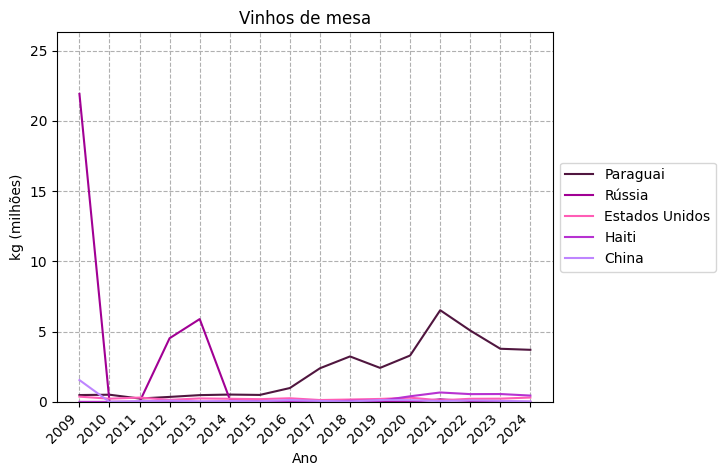

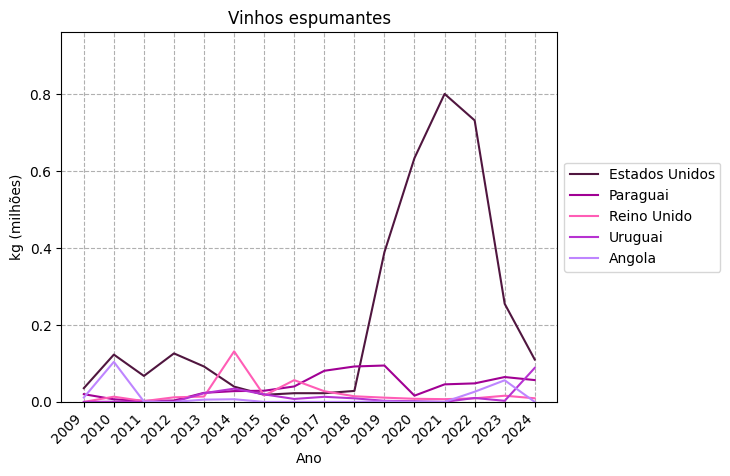

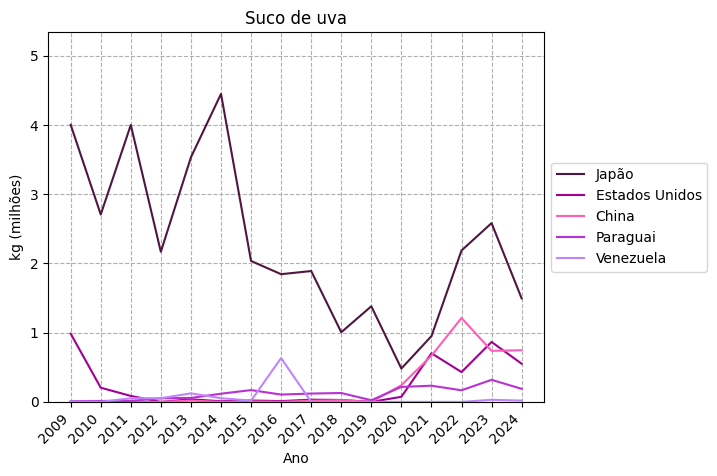

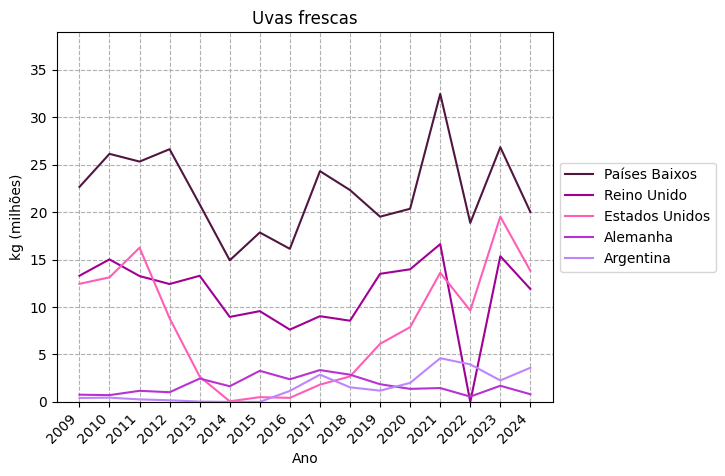

In [211]:
for type in type_color_name.keys():
    make_line_graph_of_type(type)

### Qual país mais comprou nos últimos 15 anos, por volume total?

In [212]:
df_exports_by_country_total = df_exports_million.groupby('pais_destino').sum(numeric_only=True)[['kg','valor']].reset_index()
df_exports_by_country_total = df_exports_by_country_total.sort_values(by='kg',ascending=False)
df_exports_by_country_total['valor_por_kg'] = df_exports_by_country_total['valor'] / df_exports_by_country_total['kg']
df_exports_by_country_total.head(5)

,pais_destino,kg,valor,valor_por_kg
137,Países Baixos,356.444325,753.357290,2.113534
146,Reino Unido,183.980619,431.261744,2.344061
63,Estados Unidos,140.602780,359.175130,2.554538
97,Japão,37.875369,100.170258,2.644734
136,Paraguai,37.111757,52.449043,1.413273


In [213]:
df_exports_by_country_top5 = df_exports_by_country_total.head(10)['pais_destino'].values

In [214]:
df_exports_by_country_categories = df_exports_million.groupby(['pais_destino', 'tipo']).sum(numeric_only=True)[['kg', 'valor']]
df_exports_by_country_categories

kg      valor
pais_destino  tipo                                   
Afeganistão   Vinhos de mesa      0.000011   0.000046
Africa do Sul Uvas frescas        0.015382   0.032448
Alemanha      Suco de uva         0.038742   0.023523
              Uvas frescas       27.419658  56.933674
              Vinhos de mesa      0.654781   2.196372
...                                    ...        ...
Áustria       Vinhos de mesa      0.000681   0.005432
Índia         Suco de uva         0.000604   0.001007
              Uvas frescas        0.003169   0.009080
              Vinhos de mesa      0.000378   0.001560
              Vinhos espumantes   0.000043   0.000146

[512 rows x 2 columns]

In [215]:
media = df_exports_by_country_total['kg'].mean()
media_top10 = df_exports_by_country_total['kg'].head(10).mean()

In [216]:
def make_bar_graph(df : pd.DataFrame, xlabel : str, ylabel : str, xtick_rotation : int = 45, stacked : bool = False, color_dict : dict = type_color):
    axis = df.plot(kind='bar',
                   stacked = stacked,
                   color = [color_dict.get(x, '#333333') for x in df.columns])
    
    plt.xlabel('País')
    plt.ylabel('kg (milhões)')
    plt.xticks(rotation=45, ha='right')

    axis.set_axisbelow(True)
    plt.grid(axis='y', zorder=-1)

    return axis

In [217]:
df_exports_by_country_top10_categories = df_exports_million.loc[df_exports_million['pais_destino'].
                                                       isin(df_exports_by_country_top5)].groupby(['pais_destino', 'tipo']).sum(numeric_only=True)
df_exports_by_country_top10_categories

categoria          kg       valor  \
pais_destino   tipo                                                   
Alemanha       Suco de uva              0.0    0.038742    0.023523   
               Uvas frescas             0.0   27.419658   56.933674   
               Vinhos de mesa           0.0    0.654781    2.196372   
               Vinhos espumantes        0.0    0.073326    0.352395   
Argentina      Suco de uva              0.0    0.044001    0.250348   
               Uvas frescas             0.0   24.507646   49.621718   
               Vinhos de mesa           0.0    0.076572    0.425513   
               Vinhos espumantes        0.0    0.023747    0.183207   
Espanha        Suco de uva              0.0    0.093072    0.053310   
               Uvas frescas             0.0   21.482494   39.858516   
               Vinhos de mesa           0.0    1.990429    3.807951   
               Vinhos espumantes        0.0    0.011635    0.105405   
Estados Unidos Suco de uva              0.0    4.041101    8.621653   
               Uvas frescas             0.0  129.403203  330.412322   
               Vinhos de mesa           0.0    3.659709    9.957775   
               Vinhos espumantes        0.0    3.498767   10.183380   
Japão          Suco de uva              0.0   36.726935   97.279630   
               Uvas frescas             0.0    0.003343    0.010816   
               Vinhos de mesa           0.0    1.001661    2.324119   
               Vinhos espumantes        0.0    0.143430    0.555693   
Paraguai       Suco de uva              0.0    1.943596    2.581019   
               Uvas frescas             0.0    0.006782    0.008225   
               Vinhos de mesa           0.0   34.508515   47.984063   
               Vinhos espumantes        0.0    0.652864    1.875736   
Países Baixos  Suco de uva              0.0    0.212593    0.542202   
               Uvas frescas             0.0  355.299971  749.619273   
               Vinhos de mesa           0.0    0.901060    3.035719   
               Vinhos espumantes        0.0    0.030701    0.160096   
Reino Unido    Suco de uva              0.0    0.044994    0.091936   
               Uvas frescas             0.0  182.420812  424.769475   
               Vinhos de mesa           0.0    1.165560    4.747648   
               Vinhos espumantes        0.0    0.349253    1.652685   
Romênia        Uvas frescas             0.0   13.194830   28.569808   
Rússia         Suco de uva              0.0    0.000096    0.000120   
               Uvas frescas             0.0    1.979444    4.237609   
               Vinhos de mesa           0.0   32.822197   23.152054   
               Vinhos espumantes        0.0    0.120409    0.050880   

                                  valor_por_kg  
pais_destino   tipo                             
Alemanha       Suco de uva           16.437066  
               Uvas frescas          33.609343  
               Vinhos de mesa        78.890158  
               Vinhos espumantes     84.721086  
Argentina      Suco de uva           82.353706  
               Uvas frescas          27.989982  
               Vinhos de mesa        69.480175  
               Vinhos espumantes     24.080716  
Espanha        Suco de uva            5.033737  
               Uvas frescas          22.346573  
               Vinhos de mesa        51.032163  
               Vinhos espumantes     73.621073  
Estados Unidos Suco de uva           35.898907  
               Uvas frescas          42.632590  
               Vinhos de mesa        47.371831  
               Vinhos espumantes     65.406239  
Japão          Suco de uva           41.143455  
               Uvas frescas          23.572629  
               Vinhos de mesa        41.326283  
               Vinhos espumantes     72.095871  
Paraguai       Suco de uva           23.549908  
               Uvas frescas           4.890395  
               Vinhos de mesa        21.964577  
               Vinhos espumantes     47

Text(9.6, 3.1769377934782606, 'Média de todos os dados')

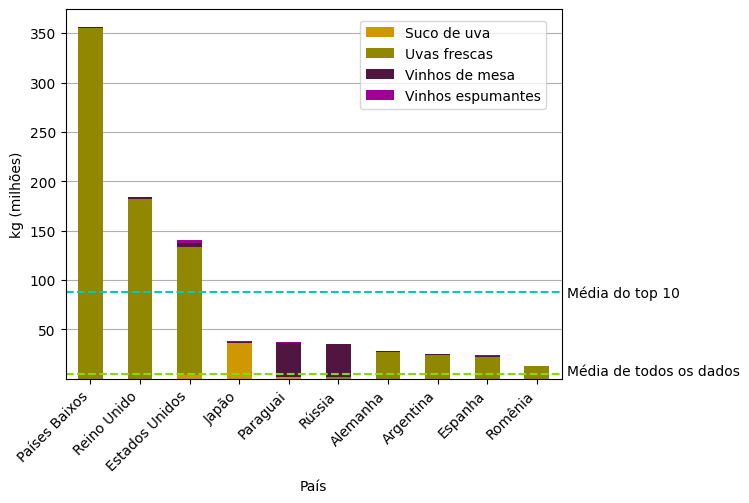

In [218]:
df_exports_by_country_top5_categories_unstack = df_exports_by_country_top10_categories['kg'].reindex(index=df_exports_by_country_top5,level=0).unstack()
axis = make_bar_graph(df_exports_by_country_top5_categories_unstack, 'País', 'kg (milhões)', stacked=True)

axis.axhline(media, c=colors_accent[0],ls='--')
axis.axhline(media_top10, c=colors_accent[1], ls='--')

axis.legend(loc='center left', bbox_to_anchor=(0.58,  0.85))
axis.text(axis.get_xlim()[1]+0.1, media_top10 - 5,'Média do top 10')
axis.text(axis.get_xlim()[1]+0.1, media - 2,'Média de todos os dados')

### Por categoria

In [223]:
def make_bar_graph_category (type : str):
    filtro = df_exports_by_country_categories.reset_index()['tipo'] == type
    df = df_exports_by_country_categories.reset_index()[filtro][['pais_destino','tipo','kg']].sort_values('kg',ascending=False)
    axis = df.head(10).plot(kind='bar', x='pais_destino', y='kg', color=type_color[type])
    axis.legend([type])
    plt.xlabel('País')
    plt.ylabel('kg (milhões)')
    plt.xticks(rotation=45, ha='right')
    my.add_grid(axis)
    my.set_y_lim(df, 'kg', 0.1)
    my.rotate_label(25, 'right')
    axis.set_ylim(0,axis.get_ylim()[1]*1.2)
    axis.set_axisbelow(True)
    plt.grid(axis='y', zorder=-1)
    return axis

<Axes: xlabel='País', ylabel='kg (milhões)'>

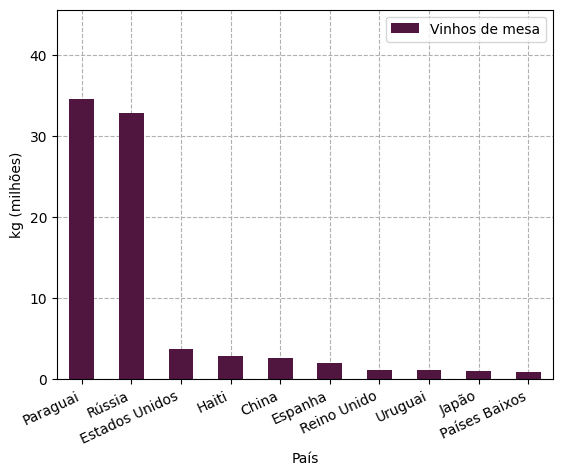

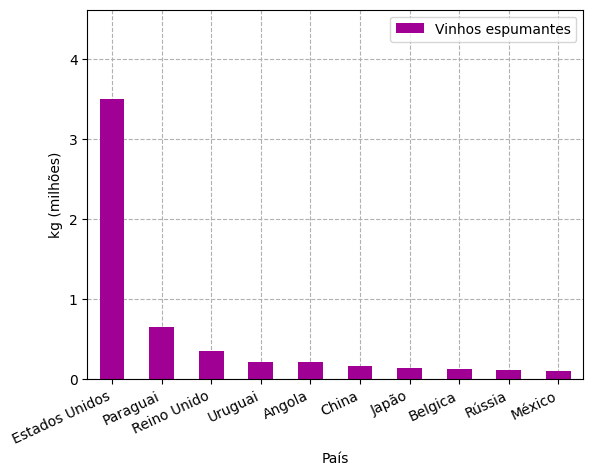

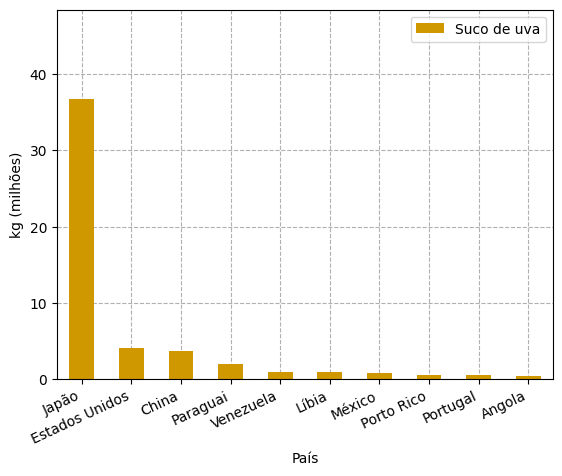

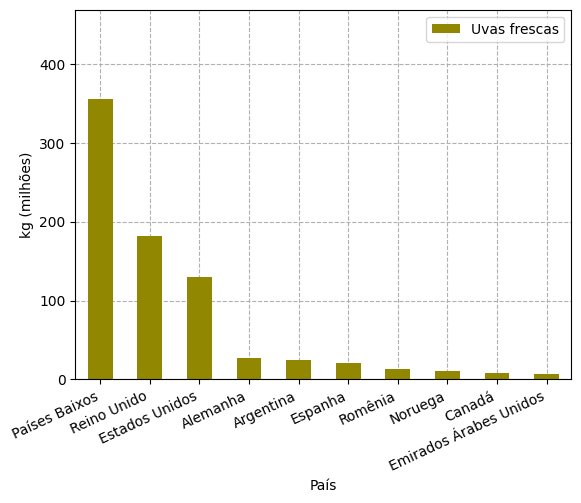

In [224]:
type = 'Vinhos de mesa'
make_bar_graph_category(type)
type = 'Vinhos espumantes'
make_bar_graph_category(type)
type = 'Suco de uva'
make_bar_graph_category(type)
type = 'Uvas frescas'
make_bar_graph_category(type)

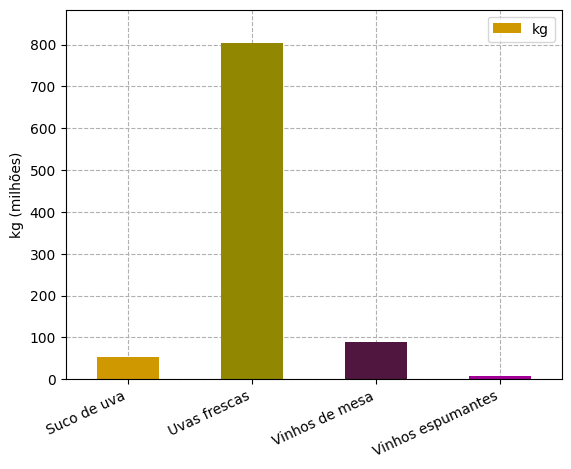

In [221]:
df = df_exports_million.groupby('tipo').sum(numeric_only=True).reset_index()
axq = df.plot(kind='bar', x='tipo', y='kg', color = [type_color.get(x, '#333333') for x in df['tipo']])
axq.set_ylabel('kg (milhões)')
axq.set_xlabel('')
my.add_grid(axq)
my.set_y_lim(df, 'kg', 0.1)
my.rotate_label(25, 'right')

### Conclusões
- Por PESO TOTAL, nos ÚLTIMOS 15 ANOS, quem mais comprou foram os PAÍSES BAIXOS

## Qual país trouxe MAIS DINHEIRO, no total?

In [ ]:
df_exports_by_country_total_sort_by_value = df_exports_by_country_total.sort_values('valor',ascending=False)

,pais_destino,kg,valor,valor_por_kg
137,Países Baixos,356.444325,753.357290,2.113534
146,Reino Unido,183.980619,431.261744,2.344061
63,Estados Unidos,140.602780,359.175130,2.554538
97,Japão,37.875369,100.170258,2.644734
2,Alemanha,28.186507,59.505964,2.111151
...,...,...,...,...
87,Ilhas Virgens,0.000000,0.000000,NaN
76,Guadalupe,0.000000,0.000000,NaN
148,República Centro Africana,0.000000,0.000000,NaN
125,Namíbia,0.000000,0.000000,NaN


D:\Temp\ipykernel_27952\1307286120.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


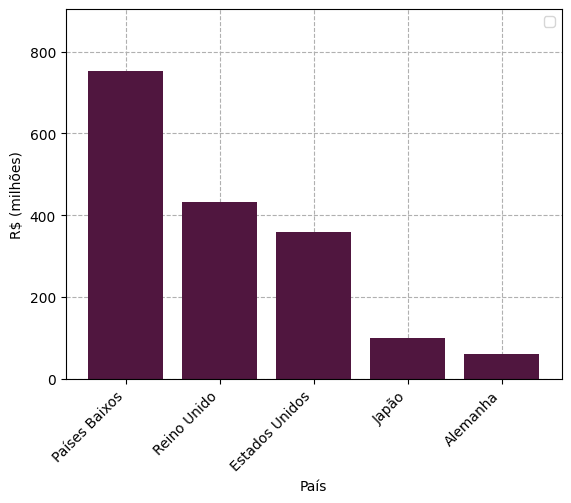

In [240]:
fig, ax = plt.subplots()

plt.bar('pais_destino', 'valor', data=df_exports_by_country_total.sort_values('valor',ascending=False).head(5))

# for kind in export_type:
#     df = df_exports_total_by_year_by_type.loc[kind].reset_index()
#     plt.plot('ano', 'kg', data=df, color=type_color[kind], label=kind)
my.add_grid(ax)
plt.legend()

my.set_labels('País', 'R$ (milhões)')
my.rotate_label()
my.set_y_lim(df_exports_by_country_total, 'valor')

## Qual produto trouxe MAIS DINHEIRO, no total?

## Qual produto trouxe MAIS DINHEIRO POR KG?

## Qual a linha do tempo de CADA PRODUTO?

## Qual a linha do tempo dos PAÍSES EM MAIOR DESTAQUE?

## Há relação entre os dados e o CONTINENTE a qual estamos exportando?